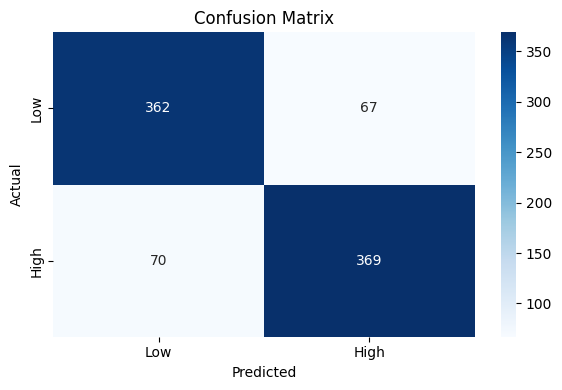

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv(r"C:\Users\HARSH\OneDrive\Desktop\Retail_Internship_Project\data\cleaned\customer_features.csv")
df["HighValue"] = (df["Monetary"] > df["Monetary"].median()).astype(int)

# Safe features (no leakage)
X = df[["Recency", "Frequency", "DistinctItems"]]
y = df["HighValue"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 1️⃣ Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig(r"C:\Users\HARSH\OneDrive\Desktop\Retail_Internship_Project\reports\figures\confusion_matrix.png")
plt.show()


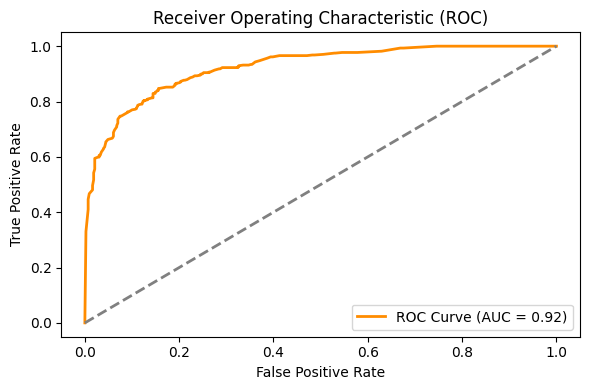

In [2]:
from sklearn.metrics import roc_auc_score

# Get probability scores for class 1
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(r"C:\Users\HARSH\OneDrive\Desktop\Retail_Internship_Project\reports\figures\roc_curve.png")
plt.show()
